# 결정 트리 무작정 해보기 - 붓꽃 데이터 분류

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=iris.target)

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [4]:
# 성능 평가
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9666666666666667
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [5]:
# 시각화

## 결정 트리 시각화 도구  - GraphViz

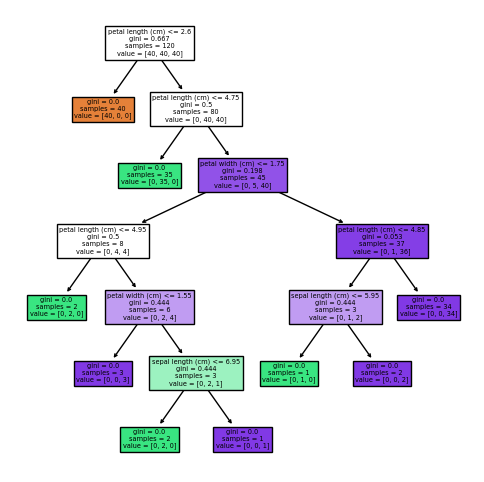

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize = (6,6))
plot_tree(dt,max_depth=10 , filled = True, feature_names = iris.feature_names);

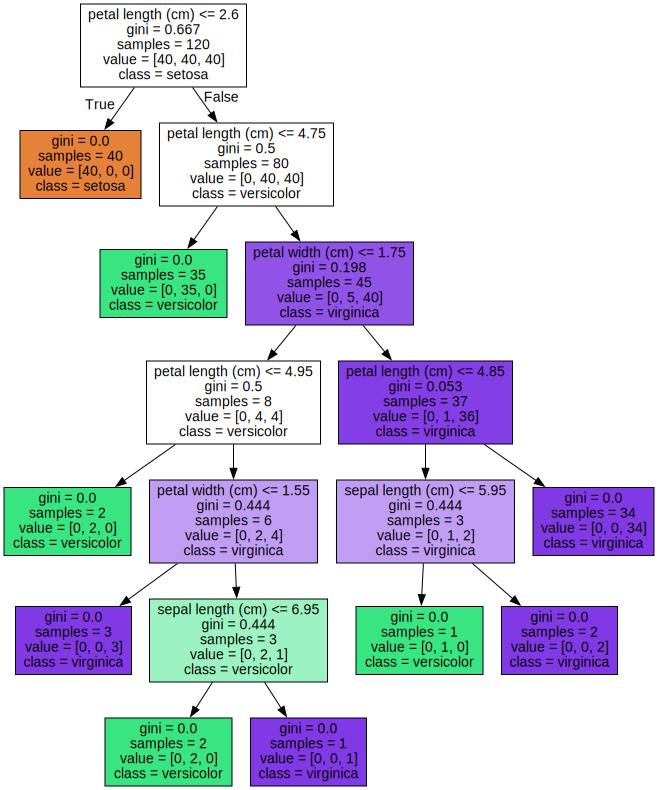

In [7]:
from sklearn.tree import export_graphviz
import graphviz
label_names=iris.target_names
#best_dt =grid.best_estimator
dot_data = export_graphviz(dt, out_file=None, class_names=label_names,\
                           feature_names = iris.feature_names,\
                           impurity=True, filled=True)

# Draw graph with png format , default pdf
graph = graphviz.Source(dot_data, format="png") 
graph

# 파일로 만드는 경우, 
#graph.render('tree')



## 결정 트리 실습 1) 와인 데이터 - Kaggle 와인 데이터를 일부 활용하여 사용

와인데이터 from Keggle
0이면 레드와인, 1이면 화이트 -> 전체 와인 중 화이트와인을 골라낸다

In [43]:
# 데이터 수집
import pandas as pd
import numpy as np

wine_kaggle = pd.read_csv('data/wine_dataset.csv')
wine_kaggle.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [44]:
wine_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [45]:
wine_kaggle['style'].value_counts(normalize=True) # 아스키 코드가 r 이 먼저오니까 red 가 0

white    0.753886
red      0.246114
Name: style, dtype: float64

In [46]:
# wine_kaggle의 alcohol, residual_sugar, pH, style 데이터만 사용
wine = wine_kaggle[['alcohol', 'residual_sugar', 'pH', 'style']]
wine.columns = ['alcohol', 'sugar', 'pH', 'style']
wine

,alcohol,sugar,pH,style
0,9.4,1.9,3.51,red
1,9.8,2.6,3.20,red
2,9.8,2.3,3.26,red
3,9.8,1.9,3.16,red
4,9.4,1.9,3.51,red
...,...,...,...,...
6492,11.2,1.6,3.27,white
6493,9.6,8.0,3.15,white
6494,9.4,1.2,2.99,white
6495,12.8,1.1,3.34,white


In [47]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   style    6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


In [48]:
wine.describe()

,alcohol,sugar,pH
count,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501
std,1.192712,4.757804,0.160787
min,8.000000,0.600000,2.720000
25%,9.500000,1.800000,3.110000
50%,10.300000,3.000000,3.210000
75%,11.300000,8.100000,3.320000
max,14.900000,65.800000,4.010000


In [49]:
# 데이터 준비, 분할
X = wine.drop('style', axis=1).values # 데이터프레임의 values를 가져오면 2차원 array가 됨
y = wine['style'].values # 이하동문

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [50]:
print(pd.Series(y_train).value_counts(normalize=True))
print(pd.Series(y_test).value_counts(normalize=True)) # 동일한 분포로 나눈 것을 확인

white    0.753896
red      0.246104
dtype: float64
white    0.753846
red      0.246154
dtype: float64


In [51]:
# 특성 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# 결정 트리 모델 객체 생성, 학습, 평가
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# 평가
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = dt.predict(X_train_scaled)
train_score = accuracy_score(y_train, y_pred)

y_pred = dt.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred)

print(f'train score: {train_score:.2f}')
print(f'test score: {test_score:.2f}')

train score: 1.00
test score: 0.86


In [ ]:
# 과적합 모델

In [ ]:
# 데이터 탐색

### 결정트리와 과적합 및 규제

In [ ]:
# 시각화 : plot_tree()

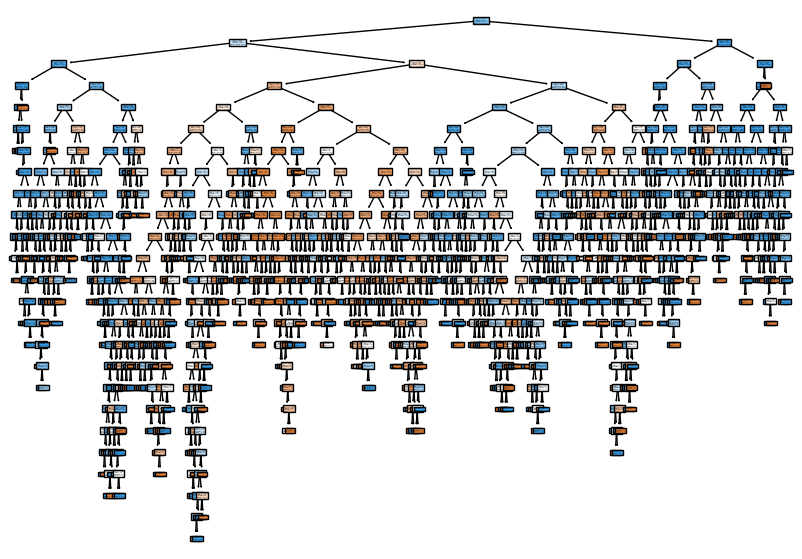

In [54]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt, filled=True);
# plot_tree(dt, max_depth=3, filled=True);

In [57]:
import graphviz
from sklearn.tree import export_graphviz

label_names = ['red', 'white']

dot_data = export_graphviz(dt, out_file=None, class_names=label_names,\
    feature_names=['alcohol', 'sugar', 'pH'],
    impurity=True, filled=True)
graph = graphviz.Source(dot_data, format='png')
graph.render("wine_kaggle")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.805383 to fit


'wine_kaggle.png'

In [ ]:
# Plot_tree()  트리 깊이 제한, 색깔 부여, 특성 이름 전달



* 가지치기 - 과적합 방지, (깊이 제한 ) 

In [39]:
dt_new = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_new.fit(X_train_scaled, y_train)

train_score = accuracy_score(y_train, dt_new.predict(X_train_scaled))
test_score = accuracy_score(y_test, dt_new.predict(X_test_scaled))
print(train_score)
print(test_score)

0.8458726188185491
0.8407692307692308


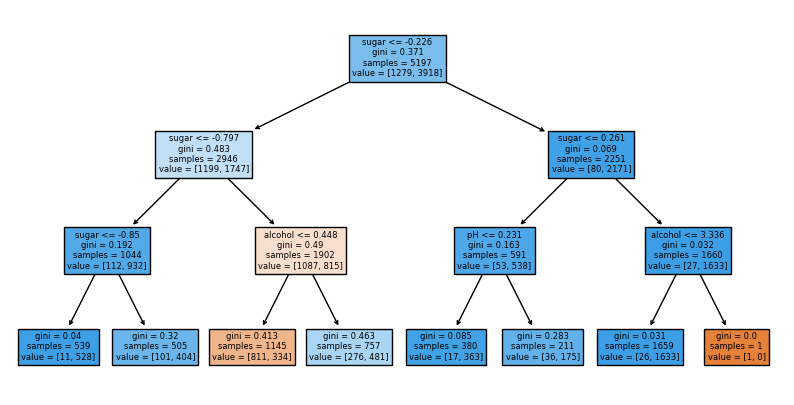

In [42]:
# 가지치기한 dt를 시각화

plt.figure(figsize=(10, 5))
plot_tree(dt_new, filled=True, feature_names=wine.columns);

* 결정 트리에서 특성 스케일링 필요성

In [61]:
# 특성을 스케일링하지 않은 경우
# 1) max_depth 제한이 없는 경우
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
train_score = accuracy_score(y_train, dt.predict(X_train))
test_score = accuracy_score(y_test, dt.predict(X_test))

print(train_score, test_score)  # 디시젼 트리는 스케일링 전과 후에 차이가 적다. 특성에다 값을 곱하고 계산하는게 아니라 분류만 하기 때문에

# 2) max_depth = 3 으로 제한한 경우
dt_new = DecisionTreeClassifier(max_depth=3)
dt_new.fit(X_train, y_train)

y_pred = dt_new.predict(X_test)
train_score = accuracy_score(y_train, dt.predict(X_train))
test_score = accuracy_score(y_test, dt.predict(X_test))

print(train_score, test_score)

0.9978833942659227 0.8653846153846154
0.9978833942659227 0.8653846153846154


In [ ]:
# 표준화 스케일링 하지 않은 DT 시각화 -> 이해하기 쉽다


## 특성 중요도(feature_importances_)
- 어떤 특성이 가장 유용한 특성인지 나타냄
- feature_importances_  속성에 저장되어 있음

- 특성 중요도 계산 원리: 각 노드의 정보 이득 * 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산함
- 특성 중요도의 활용: 특성 선택에 활용(즉, 결정 트리 모델을 특성 선택에 활용)

In [65]:
pd.Series(dt.feature_importances_, index=wine.columns[:-1])

alcohol    0.233939
sugar      0.514503
pH         0.251558
dtype: float64

<AxesSubplot: >

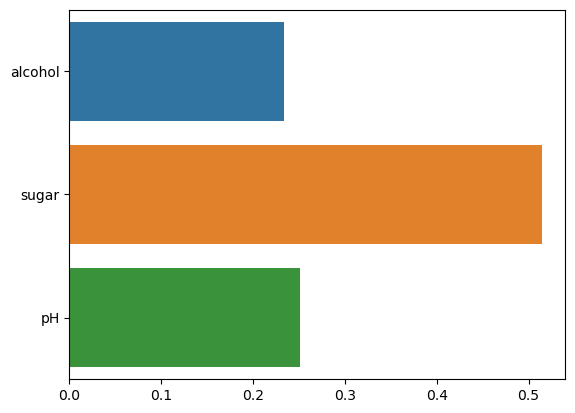

In [66]:
import seaborn as sns

sns.barplot(x=dt.feature_importances_, y=wine.columns[:-1])